In [1]:
import sys

sys.path.insert(1, 'C:/Users/peter/Desktop/volatility-forecasting/midas')

from volatility import MIDAS
import pandas as pd
import numpy as np
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Szimulációs függvény

#### A szimuláció a következőképpen zajlik:

&emsp;X is generated from a standard normal distribution: $$ x_t \sim  \mathcal{N}(0,\,1)$$
&emsp;y is equal to: $$ y_t = \alpha + \beta B(L^{12}; \Theta) x_t $$
&emsp;where $$ \alpha = 0.0 $$ $$ \beta = 2.0 $$ $$ \Theta = (1.0, \theta = 5.0) $$

In [2]:
def create_sim(lag = 12, params = [0.0, 2.0, 5.0], sim_num = 1000, sim_length = 500, plot = False):
    lls, alpha, beta, theta, runtime = np.zeros(sim_num), np.zeros(sim_num), np.zeros(sim_num), np.zeros(sim_num), np.zeros(sim_num)
    model = MIDAS(lag = lag, plot = plot)
    
    for i in range(sim_num):
        np.random.seed(i)
        x, y = model.simulate(params = params, lag = lag, num = sim_length)
        start = time.time()
        model.fit(['', 'pos', 'pos'], pd.DataFrame(x), y)
        runtime[i] = time.time() - start
        if plot == True:
            print('RunTime: {} sec.\n'.format(round(runtime[i], 4)))
        lls[i], alpha[i], beta[i], theta[i] = model.opt.fun, model.optimized_params[0], model.optimized_params[1], model.optimized_params[2]
    
    return lls, alpha, beta, theta, runtime

In [3]:
sim500 = pd.DataFrame(create_sim())

C:/Users/peter/Desktop/volatility-forecasting/midas\weights.py:25: RuntimeWarning: invalid value encountered in true_divide
  beta_vals = b.pdf(x, params[0], params[1]) / np.sum(b.pdf(x, params[0], params[1]))
C:/Users/peter/Desktop/volatility-forecasting/midas\base.py:34: RuntimeWarning: overflow encountered in exp
  params[i] = np.exp(params_trans[i])
C:\Users\peter\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:598: RuntimeWarning: invalid value encountered in subtract
  lPx -= sc.betaln(a, b)


In [4]:
sim500 = sim500.T
sim500_des = sim500.describe().iloc[1:, :]
sim500_des['LogLikes'], sim500_des['Alpha'], sim500_des['Beta'], sim500_des['Theta'], sim500_des['Runtime'] = sim500_des[0], sim500_des[1], sim500_des[2], sim500_des[3], sim500_des[4]
sim500_des = sim500_des.iloc[:, 5:]
sim500_des

,LogLikes,Alpha,Beta,Theta,Runtime
mean,9.349566,-0.000905,1.961708,4.964331,0.347010
std,5.387857,0.023306,0.034726,0.210214,0.058302
min,1.118681,-0.276901,1.609902,2.217590,0.262059
25%,5.440162,-0.007451,1.950246,4.941318,0.314071
50%,8.180512,0.000472,1.971689,4.970995,0.338076
75%,11.737454,0.008019,1.984556,5.003850,0.360081
max,45.852775,0.254501,1.998140,5.392875,0.923209


In [5]:
sim1000 = pd.DataFrame(create_sim(sim_length = 1000))

C:/Users/peter/Desktop/volatility-forecasting/midas\weights.py:25: RuntimeWarning: invalid value encountered in true_divide
  beta_vals = b.pdf(x, params[0], params[1]) / np.sum(b.pdf(x, params[0], params[1]))
C:/Users/peter/Desktop/volatility-forecasting/midas\base.py:34: RuntimeWarning: overflow encountered in exp
  params[i] = np.exp(params_trans[i])
C:\Users\peter\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:598: RuntimeWarning: invalid value encountered in subtract
  lPx -= sc.betaln(a, b)


In [6]:
sim1000 = sim1000.T
sim1000_des = sim1000.describe().iloc[1:, :]
sim1000_des['LogLikes'], sim1000_des['Alpha'], sim1000_des['Beta'], sim1000_des['Theta'], sim1000_des['Runtime'] = sim1000_des[0], sim1000_des[1], sim1000_des[2], sim1000_des[3], sim1000_des[4]
sim1000_des = sim1000_des.iloc[:, 5:]
sim1000_des

,LogLikes,Alpha,Beta,Theta,Runtime
mean,9.516356,-0.000721,1.981011,4.981572,0.342789
std,5.589431,0.014831,0.016747,0.141943,0.047645
min,1.120846,-0.232272,1.818496,2.622687,0.266060
25%,5.501560,-0.003812,1.974801,4.970739,0.316071
50%,8.293973,0.000072,1.986285,4.985593,0.337077
75%,11.941481,0.004103,1.992095,5.002641,0.361082
max,49.090617,0.017982,1.999127,5.185101,0.911206


In [7]:
sim2000 = pd.DataFrame(create_sim(sim_length = 2000))

C:/Users/peter/Desktop/volatility-forecasting/midas\weights.py:25: RuntimeWarning: invalid value encountered in true_divide
  beta_vals = b.pdf(x, params[0], params[1]) / np.sum(b.pdf(x, params[0], params[1]))
C:/Users/peter/Desktop/volatility-forecasting/midas\base.py:34: RuntimeWarning: overflow encountered in exp
  params[i] = np.exp(params_trans[i])
C:\Users\peter\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:598: RuntimeWarning: invalid value encountered in subtract
  lPx -= sc.betaln(a, b)


In [8]:
sim2000 = sim2000.T
sim2000_des = sim2000.describe().iloc[1:, :]
sim2000_des['LogLikes'], sim2000_des['Alpha'], sim2000_des['Beta'], sim2000_des['Theta'], sim2000_des['Runtime'] = sim2000_des[0], sim2000_des[1], sim2000_des[2], sim2000_des[3], sim2000_des[4]
sim2000_des = sim2000_des.iloc[:, 5:]
sim2000_des

,LogLikes,Alpha,Beta,Theta,Runtime
mean,9.592846,-0.000606,1.990570,4.988370,0.341053
std,5.686473,0.012762,0.008491,0.122240,0.042999
min,1.121760,-0.240217,1.902199,2.730206,0.269061
25%,5.521602,-0.001904,1.987571,4.985224,0.319072
50%,8.347771,0.000057,1.993002,4.992833,0.339077
75%,12.033207,0.002085,1.996031,5.000804,0.360082
max,50.513405,0.010353,1.999460,5.095100,0.942213


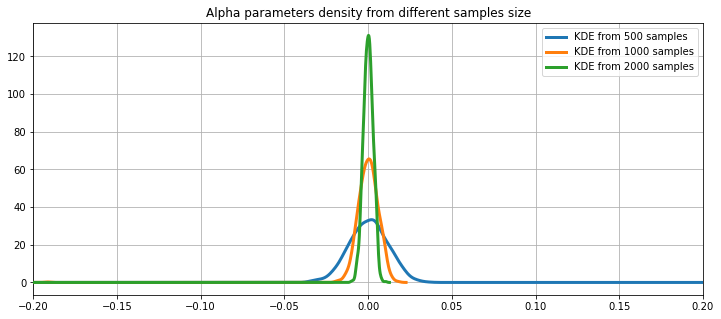

In [9]:
alpha500 = sim500.iloc[:, 1].values
alpha1000 = sim1000.iloc[:, 1].values
alpha2000 = sim2000.iloc[:, 1].values

kde500 = sm.nonparametric.KDEUnivariate(alpha500)
kde500.fit()
kde1000 = sm.nonparametric.KDEUnivariate(alpha1000)
kde1000.fit()
kde2000 = sm.nonparametric.KDEUnivariate(alpha2000)
kde2000.fit()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

ax.plot(kde500.support, kde500.density, lw = 3, label = 'KDE from 500 samples', zorder = 10)
ax.plot(kde1000.support, kde1000.density, lw = 3, label = 'KDE from 1000 samples', zorder = 10)
ax.plot(kde2000.support, kde2000.density, lw = 3, label = 'KDE from 2000 samples', zorder = 10)
plt.title('Alpha parameters density from different samples size')
ax.set_xlim((-0.2, 0.2))
ax.legend(loc = 'best')
ax.grid(True, zorder = -5)

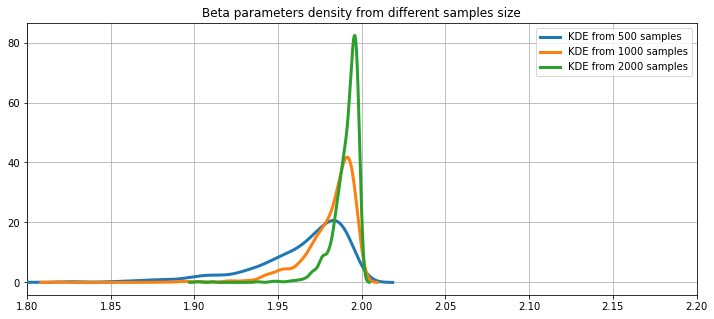

In [10]:
beta500 = sim500.iloc[:, 2].values
beta1000 = sim1000.iloc[:, 2].values
beta2000 = sim2000.iloc[:, 2].values

kde500 = sm.nonparametric.KDEUnivariate(beta500)
kde500.fit()
kde1000 = sm.nonparametric.KDEUnivariate(beta1000)
kde1000.fit()
kde2000 = sm.nonparametric.KDEUnivariate(beta2000)
kde2000.fit()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

ax.plot(kde500.support, kde500.density, lw = 3, label = 'KDE from 500 samples', zorder = 10)
ax.plot(kde1000.support, kde1000.density, lw = 3, label = 'KDE from 1000 samples', zorder = 10)
ax.plot(kde2000.support, kde2000.density, lw = 3, label = 'KDE from 2000 samples', zorder = 10)
plt.title('Beta parameters density from different samples size')
ax.set_xlim((1.8, 2.2))
ax.legend(loc = 'best')
ax.grid(True, zorder = -5)

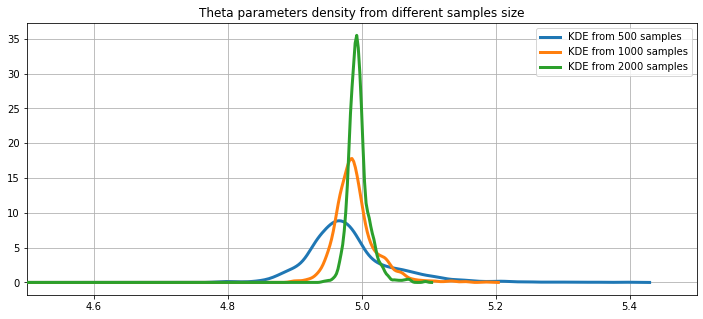

In [11]:
theta500 = sim500.iloc[:, 3].values
theta1000 = sim1000.iloc[:, 3].values
theta2000 = sim2000.iloc[:, 3].values

kde500 = sm.nonparametric.KDEUnivariate(theta500)
kde500.fit()
kde1000 = sm.nonparametric.KDEUnivariate(theta1000)
kde1000.fit()
kde2000 = sm.nonparametric.KDEUnivariate(theta2000)
kde2000.fit()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

ax.plot(kde500.support, kde500.density, lw = 3, label = 'KDE from 500 samples', zorder = 10)
ax.plot(kde1000.support, kde1000.density, lw = 3, label = 'KDE from 1000 samples', zorder = 10)
ax.plot(kde2000.support, kde2000.density, lw = 3, label = 'KDE from 2000 samples', zorder = 10)
plt.title('Theta parameters density from different samples size')
ax.set_xlim((4.5, 5.5))
ax.legend(loc = 'best')
ax.grid(True, zorder = -5)